#### Dependencias

In [40]:

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import DMatrix, train, cv, plot_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt


In [41]:


# Carga de datos local
df = pd.read_csv('train.csv').drop('Id', axis=1)
X, y = df.drop(['SalePrice'], axis=1), df['SalePrice']



In [42]:

# Realizar codificación one-hot de las variables categóricas
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
encoder = OneHotEncoder(drop='first', sparse=False)  # Utiliza drop='first' para evitar multicolinealidad
X_encoded = encoder.fit_transform(X[categorical_features])

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.95)  # Conserva el 95% de la varianza explicada
X_pca = pca.fit_transform(X_encoded)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')
print('Reporte de clasificación:\n', report)

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Precisión del modelo: 0.003424657534246575
Reporte de clasificación:
               precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         0
       81000       0.00      0.00      0.00         1
       84500       0.00      0.00      0.00         1
       84900       0.00      0.00      0.00         1
       8500

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: Undefi

In [43]:


# CArbloles de deciiosn
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

# Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Predicciones para los 3 modelos
y_pred_logistic = model.predict(X_test)
y_pred_tree = model_tree.predict(X_test)
y_pred_rf = model_rf.predict(X_test)



In [44]:
# Evaluación del rendimiento de cada modelo
mse_logistic = mean_squared_error(y_test, y_pred_logistic)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_logistic = r2_score(y_test, y_pred_logistic)
r2_tree = r2_score(y_test, y_pred_tree)
r2_rf = r2_score(y_test, y_pred_rf)

print("Error cuadrático medio (MSE) - Regresión Lineal:", mse_logistic)
print("Error cuadrático medio (MSE) - Árbol de Decisión:", mse_tree)
print("Error cuadrático medio (MSE) - Random Forest:", mse_rf)

print("R-cuadrado (R2) - Regresión Lineal:", r2_logistic)
print("R-cuadrado (R2) - Árbol de Decisión:", r2_tree)
print("R-cuadrado (R2) - Random Forest:", r2_rf)

Error cuadrático medio (MSE) - Regresión Lineal: 3694468075.0239725
Error cuadrático medio (MSE) - Árbol de Decisión: 4201048271.3356166
Error cuadrático medio (MSE) - Random Forest: 2393310948.869156
R-cuadrado (R2) - Regresión Lineal: 0.5183427698860784
R-cuadrado (R2) - Árbol de Decisión: 0.45229861705239893
R-cuadrado (R2) - Random Forest: 0.687977944585119


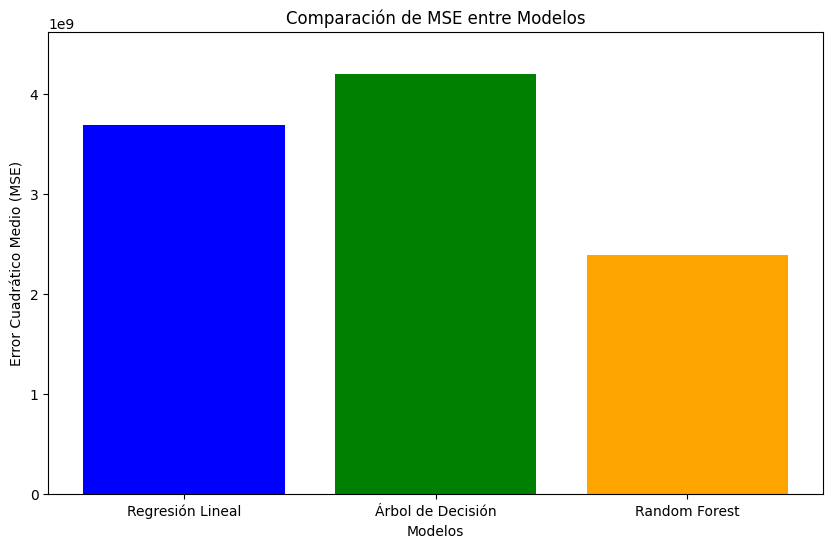

In [45]:
# Valores de MSE
mse_values = [mse_logistic, mse_tree, mse_rf]
model_names = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest']

# Grafica comparativa
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange'])
plt.xlabel('Modelos')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Comparación de MSE entre Modelos')
plt.ylim(0, max(mse_values) * 1.1)  # Ajustar el rango deY
plt.show()

In [46]:
#Iteraciones sobre random forest para mejorar la calidad
model_RF = RandomForestClassifier(n_estimators=100,  
                              max_depth=10,      
                              min_samples_split=2,  
                              min_samples_leaf=1,   
                              max_features=10,  
                              random_state=42)   

model_RF.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf_2 = model_RF.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
mse_rf_2 = mean_squared_error(y_test, y_pred_rf_2)

print(f'Precisión del modelo de Random Forest: {accuracy}')
print("Error cuadrático medio (MSE) - Random Forest ajustado:", mse_rf_2)


Precisión del modelo de Random Forest: 0.003424657534246575
Error cuadrático medio (MSE) - Random Forest ajustado: 6305839195.150685


In [47]:


# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'max_iter': [100, 200, 300],  # Número máximo de iteraciones
}

# grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# mejorr modelo
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

# Mse del emjor modelo 
mse = mean_squared_error(y_test, y_pred)

print(f'Mejor combinación de hiperparámetros: {grid_search.best_params_}')
print(f'MSE del mejor modelo: {mse}')

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\

Mejor combinación de hiperparámetros: {'C': 10, 'max_iter': 200}
MSE del mejor modelo: 3842051708.7842464


2. Como segunda prueba, disminuimos el número de variables a las que utilizaremos en el formulario creado en nuestro Dasboard. Las varaibles seleccionadas son: 
- OverallQuall 
- YearBuilt
- TotalBsmtSF
- GarageCars
- GarageArea 
- 1stFlrSF
- ExterQual
- Neighborhood
- GrLivArea
- KitchenQual

Variables que representan una mayor correlación con el precio de la vivienda

In [48]:
variables_correlacionadas=["OverallQual","YearBuilt","TotalBsmtSF","GarageCars","GarageArea","1stFlrSF","ExterQual","Neighborhood","GrLivArea","KitchenQual"]
new_X=df[variables_correlacionadas]
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   YearBuilt     1460 non-null   int64 
 2   TotalBsmtSF   1460 non-null   int64 
 3   GarageCars    1460 non-null   int64 
 4   GarageArea    1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   ExterQual     1460 non-null   object
 7   Neighborhood  1460 non-null   object
 8   GrLivArea     1460 non-null   int64 
 9   KitchenQual   1460 non-null   object
dtypes: int64(7), object(3)
memory usage: 114.2+ KB


In [49]:
#Corremos nuestro mejor modelo haciendo uso del nuevo set de variables
object_mask = new_X.select_dtypes('object').columns
new_X[object_mask] = new_X[object_mask].astype('category')

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, shuffle=True, random_state=1399)
print(f'Train: {X_train.shape}')
print(f'Train: {X_test.shape}')

dtrain = DMatrix(data=X_train, label=y_train, feature_names=new_X.columns.tolist(), enable_categorical=True)
dtest = DMatrix(data=X_test, label=y_test, feature_names=new_X.columns.tolist(), enable_categorical=True)

params = {
    'eta': 0.01,
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'eval_metric': ['rmse', 'mae'],
    'nthread': 24,
    'seed': 1399,
    'verbosity': 1
}


cv_results = cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    nfold=5,
    early_stopping_rounds=10,
    verbose_eval=10,
    show_stdv=False
)


model = train(
    params=params,
    dtrain=dtrain,
    evals=[(dtrain,'train'), (dtest,'eval')],
    early_stopping_rounds=10,
    num_boost_round=500,
    verbose_eval=10
)

predictions = model.predict(dtest)
mse4 = mean_squared_error(dtest.get_label(), predictions, squared=False)
print(f'RMSE: {mean_squared_error(dtest.get_label(), predictions, squared=False):} USD')

Train: (1168, 10)
Train: (292, 10)
[0]	train-rmse:78419.36589	train-mae:56576.49478	test-rmse:78284.69923	test-mae:56628.26355


[10]	train-rmse:72166.23203	train-mae:51840.23392	test-rmse:72805.70827	test-mae:52256.21657


C:\Users\maria\AppData\Local\Temp\ipykernel_14396\4206687857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X[object_mask] = new_X[object_mask].astype('category')


[20]	train-rmse:66518.24384	train-mae:47553.06695	test-rmse:67961.24552	test-mae:48406.73266
[30]	train-rmse:61396.45828	train-mae:43680.99010	test-rmse:63623.94430	test-mae:44943.40314
[40]	train-rmse:56751.75698	train-mae:40183.95572	test-rmse:59777.70443	test-mae:41838.69283
[50]	train-rmse:52547.12523	train-mae:37014.67875	test-rmse:56450.44713	test-mae:39089.10716
[60]	train-rmse:48735.38690	train-mae:34153.44820	test-rmse:53481.07862	test-mae:36638.39494
[70]	train-rmse:45267.35972	train-mae:31570.71656	test-rmse:50812.08913	test-mae:34445.41655
[80]	train-rmse:42111.55806	train-mae:29245.60478	test-rmse:48491.71042	test-mae:32538.53538
[90]	train-rmse:39235.98731	train-mae:27146.73110	test-rmse:46540.86924	test-mae:30879.57358
[100]	train-rmse:36611.79853	train-mae:25245.18153	test-rmse:44816.05647	test-mae:29446.17661
[110]	train-rmse:34220.84650	train-mae:23524.05312	test-rmse:43294.39539	test-mae:28199.95502
[120]	train-rmse:32060.20459	train-mae:21981.89045	test-rmse:41951.7